In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings.head(10)

NameError: name 'ratings' is not defined

In [ ]:
dataset = ratings.merge(movies,on='movieId',how='left')
dataset.head(30)

In [69]:
dataset[dataset['userId']==1].head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
5,1,1263,2.0,1260759151,"Deer Hunter, The (1978)",Drama|War
6,1,1287,2.0,1260759187,Ben-Hur (1959),Action|Adventure|Drama
7,1,1293,2.0,1260759148,Gandhi (1982),Drama
8,1,1339,3.5,1260759125,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller
9,1,1343,2.0,1260759131,Cape Fear (1991),Thriller


In [70]:
pd.DataFrame(dataset.groupby('title')['rating'].mean().sort_values(ascending=False)).head(30)

,rating
title,
Burn Up! (1991),5.0
Absolute Giganten (1999),5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972),5.0
Erik the Viking (1989),5.0
Reality (2014),5.0
Ice Princess (2005),5.0
Ice Age: The Great Egg-Scapade (2016),5.0
Au Hasard Balthazar (1966),5.0
"Life of Emile Zola, The (1937)",5.0


In [71]:
pd.DataFrame(dataset.groupby('title')['rating'].count().sort_values(ascending=False)).head(30)

,rating
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291
Jurassic Park (1993),274
"Matrix, The (1999)",259
Toy Story (1995),247
Schindler's List (1993),244


In [72]:
new = pd.DataFrame(dataset.groupby('title')['rating'].mean())
new['no_of_ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())
new

,rating,no_of_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


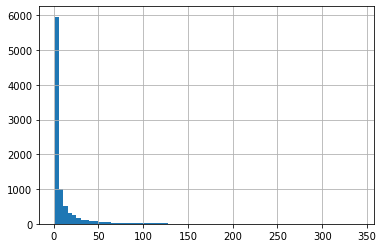

In [73]:
new['no_of_ratings'].hist(bins=70)
# plt.figure(figsize=(10,50))

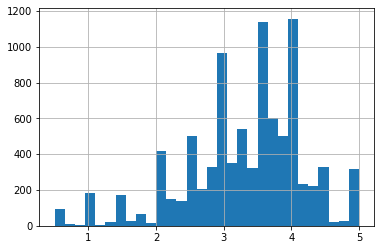

In [74]:
new['rating'].hist(bins=30)

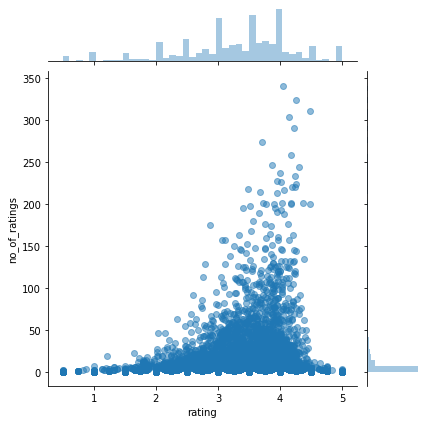

In [75]:
sns.jointplot(x='rating',y='no_of_ratings',data=new,alpha=0.5)